# کتابخانه ها

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler, RobustScaler
from sklearn.metrics import accuracy_score ,roc_auc_score ,RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import StratifiedKFold, KFold , cross_val_score

# import Data

In [3]:
input = pd.read_csv('creditcard.csv')
# --------------------------------------
input.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
input.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [5]:
input.drop(['Time'],axis=1,inplace=True)
input.shape

(284807, 30)

In [6]:
input['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

# خوب ما الان 
# 280000 داده ی درست
# 500 داده ی غلط

class Distribution:
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


C:\Users\pooya\AppData\Local\Temp\ipykernel_11648\2183957864.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target , palette=colors ,ax=ax )


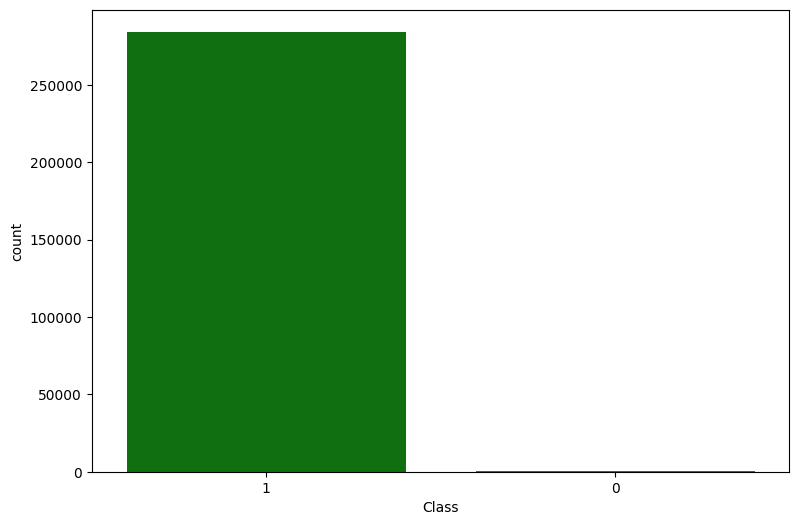

In [7]:
target=input['Class']
class_counts = target.value_counts(normalize=True)*100
print(f"class Distribution:\n{class_counts}")

fig,ax=plt.subplots(figsize=(9,6))
colors = ["green","red"]
sns.countplot(x=target , palette=colors ,ax=ax )
plt.xticks(ticks=[0.0,1.0],labels=["1","0"])
plt.show()

# نرمال سازی کل داده

توضیحات این قسمت در فایل زیر هست 

README.md

In [8]:
#import pandas as pd
#from sklearn.preprocessing import StandardScaler

# خواندن داده‌ها
df = pd.read_csv("creditcard.csv")

# جدا کردن ویژگی‌ها از ستون کلاس
features = df.drop(columns=["Class"])
labels = df["Class"]

# استانداردسازی داده‌ها
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# ساخت DataFrame جدید
df_normalized = pd.DataFrame(features_normalized, columns=features.columns)
df_normalized["Class"] = labels  # افزودن ستون کلاس بدون تغییر

# ذخیره فایل نرمال شده
df_normalized.to_csv("filtered_data_normalized_ALL.csv", index=False)

print("داده‌ها استاندارد شدند و ذخیره شدند.")

داده‌ها استاندارد شدند و ذخیره شدند.


 ممکنه کمی طول بکشه

# x  !!!  y

In [9]:
df = pd.read_csv('filtered_data_normalized_ALL.csv')
x = df.iloc[:,:].values
y = target

print("feature : {}".format(x.shape))

feature : (284807, 31)




ابعاد ویژگی ها : 31 × 300000

In [10]:
#import pandas as pd
#from sklearn.model_selection import train_test_split

# تقسیم داده‌ها به آموزش و تست (با stratify برای حفظ توازن کلاس‌ها در تست)
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, shuffle=True, stratify=y
)

# تبدیل X_train و y_train به DataFrame
df_train = pd.DataFrame(X_train)
df_train['Class'] = y_train.values  # اضافه کردن ستون کلاس

# شمارش تعداد نمونه‌های هر کلاس در `X_train`
count_class1 = df_train[df_train["Class"] == 1].shape[0]
count_class0 = df_train[df_train["Class"] == 0].shape[0]
min_samples = min(count_class1, count_class0)  # کوچک‌ترین تعداد کلاس‌ها

# انتخاب min_samples نمونه از هر کلاس
df_class1 = df_train[df_train["Class"] == 1].sample(n=min_samples, random_state=42)
df_class0 = df_train[df_train["Class"] == 0].sample(n=min_samples, random_state=42)

# ترکیب داده‌های متوازن شده
df_train_balanced = pd.concat([df_class1, df_class0], ignore_index=True)

# جدا کردن ویژگی‌ها و برچسب‌ها
X_train_balanced = df_train_balanced.drop(columns=["Class"])
y_train_balanced = df_train_balanced["Class"]

# نمایش تعداد نمونه‌های هر کلاس
print("📌 تعداد نمونه‌های هر کلاس در مجموعه **آموزشی متوازن شده**:")
print(y_train_balanced.value_counts())

# بررسی تعداد نمونه‌های هر کلاس در مجموعه **تست**
print("\n📌 تعداد نمونه‌های هر کلاس در مجموعه **تست**:")
print(y_test.value_counts())

# ذخیره دیتاست متوازن شده
save_path = "balanced_train_data.csv"
df_train_balanced.to_csv(save_path, index=False)
print(f"\n✅ دیتاست آموزشی متوازن ذخیره شد در: {save_path}")



📌 تعداد نمونه‌های هر کلاس در مجموعه **آموزشی متوازن شده**:
Class
1    394
0    394
Name: count, dtype: int64

📌 تعداد نمونه‌های هر کلاس در مجموعه **تست**:
Class
0    56864
1       98
Name: count, dtype: int64

✅ دیتاست آموزشی متوازن ذخیره شد در: balanced_train_data.csv


ما الان فایل دیگری ساختیم : 

ویژگی این فایل

بالانس داده 



# model

In [11]:
# 🎯 تعریف مدل Optimal Bayes Classifier
class OptimalBayesClassifier:
    def __init__(self):
        self.priors = None
        self.likelihoods = None

    def calculate_prior(self, y):
        """محاسبه احتمال پیشین P(Class)"""
        classes, counts = np.unique(y, return_counts=True)
        self.priors = {c: count / len(y) for c, count in zip(classes, counts)}

    def calculate_likelihood(self, X, y):
        """محاسبه توزیع احتمال P(X|Class)"""
        self.likelihoods = {}
        classes = np.unique(y)
        for c in classes:
            X_c = X[y == c]
            self.likelihoods[c] = {
                i: {"mean": np.mean(X_c[:, i]), "var": np.var(X_c[:, i]) + 1e-6}  # جلوگیری از تقسیم بر صفر
                for i in range(X.shape[1])
            }

    def calculate_posterior(self, X):
        """محاسبه P(Class|X) با استفاده از قضیه بیز"""
        posteriors = []
        for x in X:
            posterior = {}
            for c in self.priors:
                prior = np.log(self.priors[c])  # تبدیل احتمال به لگاریتم
                likelihood = sum(
                    np.log(1 / (np.sqrt(2 * np.pi * self.likelihoods[c][i]["var"]))) -
                    ((x[i] - self.likelihoods[c][i]["mean"]) ** 2 / (2 * self.likelihoods[c][i]["var"]))
                    for i in range(len(x))
                )
                posterior[c] = prior + likelihood
            posteriors.append(posterior)
        return posteriors

    def predict(self, X):
        """پیش‌بینی کلاس جدید با توجه به احتمال پسین"""
        posteriors = self.calculate_posterior(X)
        return [max(p, key=p.get) for p in posteriors]

    def fit(self, X, y):
        """آموزش مدل"""
        self.calculate_prior(y)
        self.calculate_likelihood(X, y)

In [12]:
model = OptimalBayesClassifier()
model.fit(X_train_balanced.values, y_train_balanced.values)  # تبدیل به آرایه NumPy

# 🔍 پیش‌بینی روی داده‌های تست اصلی
y_pred = model.predict(X_test)

# 📊 محاسبه دقت مدل
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 دقت مدل بیز پس از متوازن‌سازی داده‌های آموزشی: {accuracy:.4f}")

🎯 دقت مدل بیز پس از متوازن‌سازی داده‌های آموزشی: 1.0000


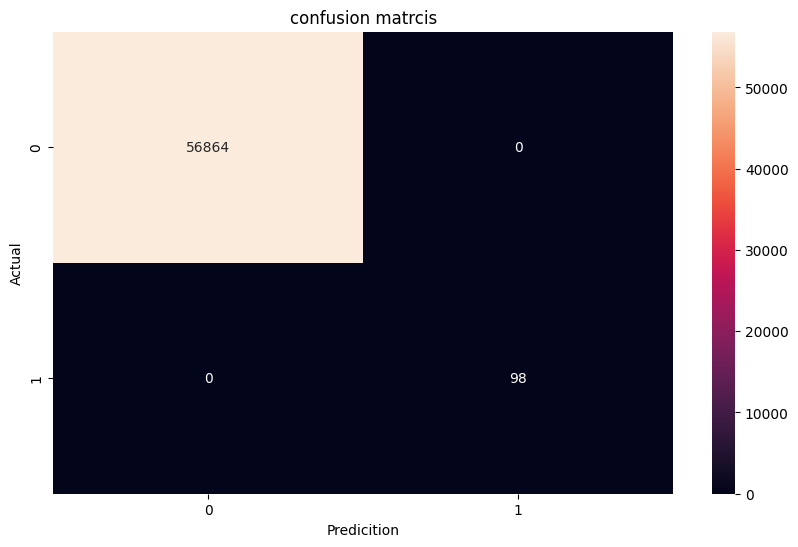

In [13]:
model = OptimalBayesClassifier()
model.fit(X_train_balanced.values, y_train_balanced.values)  # تبدیل به آرایه NumPy
y_pred =model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.subplots(figsize = (10,6))
sns.heatmap(cm ,annot =True , fmt = 'g')
plt.xlabel("Predicition")
plt.ylabel("Actual")
plt.title("confusion matrcis")
plt.show()

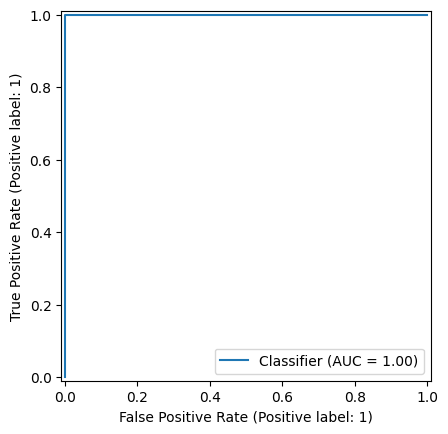

In [14]:
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

در آخر ما تونستیم مدلی  100% 

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# محاسبه معیارهای ارزیابی
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# نمایش نتایج
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
AUC-ROC: 1.0000


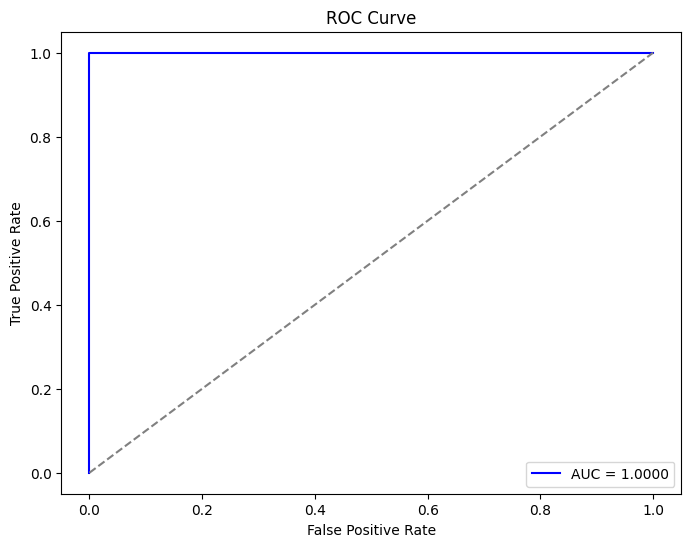

In [17]:
from sklearn.metrics import roc_curve

# محاسبه مقدار‌های مورد نیاز برای رسم منحنی ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)

# رسم نمودار ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # خط تصادفی
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


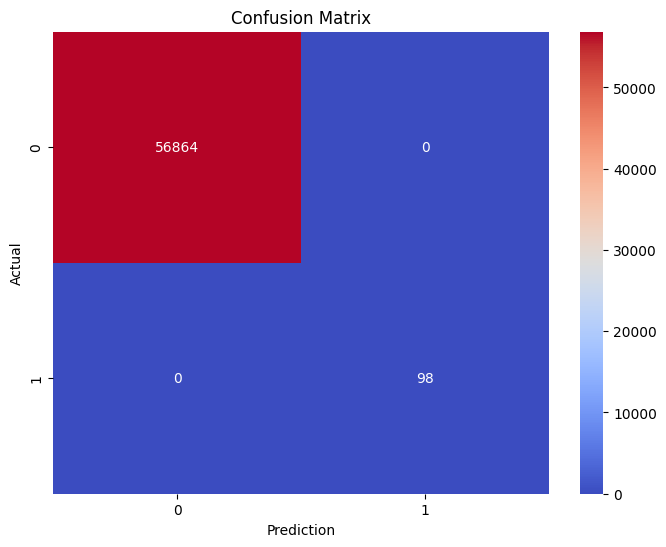

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# ایجاد ماتریس درهم‌ریختگی
cm = confusion_matrix(y_test, y_pred)

# رسم نمودار
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap="coolwarm", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


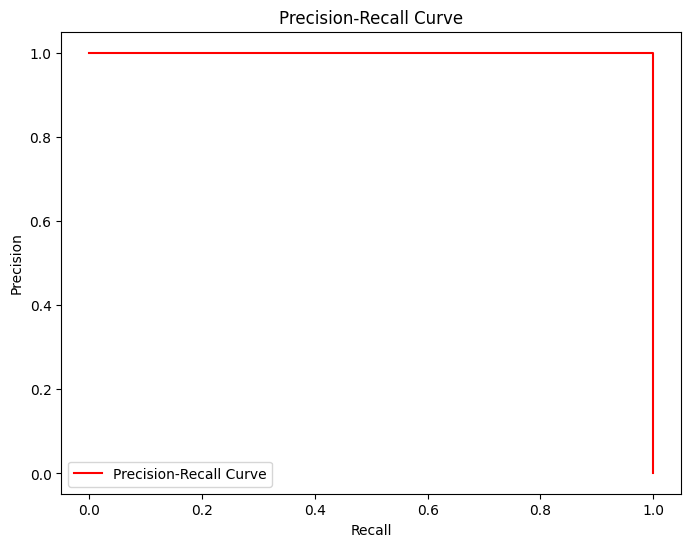

In [19]:
from sklearn.metrics import precision_recall_curve

# محاسبه مقدار‌های Precision و Recall
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred)

# رسم نمودار Precision-Recall
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='red', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()
